<a href="https://colab.research.google.com/github/Singati2/Ganesh-Shiwakoti/blob/main/Random_Walk_MNIST_6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
import torch
from skimage.util import montage

In [2]:

def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [3]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [4]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [5]:
#MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 96973433.92it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 36420833.98it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 27112424.23it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21143761.12it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [7]:
X.shape,Y.shape,X_test.shape,Y_test.shape

((60000, 1, 28, 28), (60000,), (10000, 1, 28, 28), (10000,))

In [15]:
x = X[5,0,:,:]

In [16]:
x.shape

(28, 28)

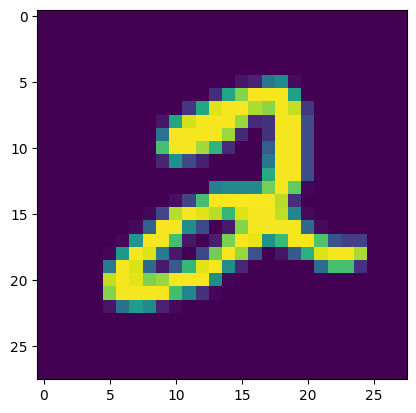

In [17]:
plt.imshow(x)

In [18]:
a = np.random.random((5,1))

In [19]:


a

array([[0.82166359],
       [0.77995318],
       [0.46019005],
       [0.12263602],
       [0.14319118]])

In [20]:
a.T

array([[0.82166359, 0.77995318, 0.46019005, 0.12263602, 0.14319118]])

In [21]:
b = np.random.random((5,5))

In [ ]:
b.shape,a.shape

((5, 5), (5, 1))

In [ ]:
b@a

array([[1.3140868 ],
       [1.83030994],
       [1.29002961],
       [1.63996877],
       [1.42033306]])

In [ ]:
b = np.random.random((2,5))

In [ ]:
b@a

array([[0.91913562],
       [1.17148954]])

In [ ]:
b.shape,a.shape

((2, 5), (5, 1))

In [ ]:
x = np.random.random((784,1))

In [ ]:
x.shape

(28, 28)

In [ ]:
m = np.random.random((10,784))

In [24]:
m@x

NameError: ignored

In [22]:
y = m@x

NameError: ignored

In [ ]:
y.shape

(10, 1)

In [ ]:
m.shape,x.shape

((10, 784), (784, 1))

In [ ]:
np.max(y)

196.79741916395977

In [ ]:
np.argmax(y)

8

In [ ]:
X.shape

(60000, 1, 28, 28)

In [ ]:
X.shape[0]

60000

In [ ]:
X.shape[1]

1

In [ ]:
X.shape[2]

28

In [ ]:
X = X.reshape(X.shape[0],X.shape[2]*X.shape[3])

In [ ]:
X.shape

(60000, 784)

In [ ]:
X = X.T

In [ ]:
m = np.random.standard_normal((10,784))

In [ ]:
m.shape,X.shape

((10, 784), (784, 60000))

In [ ]:
y = m@X

In [ ]:
y.shape

(10, 60000)

In [ ]:
y = np.argmax(y, axis=0)

In [ ]:
y.shape

(60000,)

In [ ]:
Y.shape

(60000,)

In [ ]:
y

array([9, 1, 7, ..., 9, 6, 9])

In [ ]:
Y

array([5, 0, 4, ..., 5, 6, 8])

In [ ]:
y == Y

array([False, False, False, ..., False,  True, False])

In [ ]:
np.sum(y == Y)

8357

In [ ]:
len(Y)

60000

In [ ]:
acc = np.sum(y == Y)/len(Y)

In [ ]:
acc

0.13928333333333334

In [ ]:
m = np.random.standard_normal((10,784))

y = m@X

y = np.argmax(y, axis=0)

acc = np.sum(y == Y)/len(Y)

print(acc)

0.1584


In [ ]:
acc_best = 0
m_best = 0

for i in range(100):

    m = np.random.standard_normal((10,784))

    y = m@X

    y = np.argmax(y, axis=0)

    acc = np.sum(y == Y)/len(Y)

    if acc > acc_best:
        acc_best = acc
        m_best = m

        print(acc_best)

0.07218333333333334
0.1133
0.12368333333333334
0.13746666666666665
0.13955
0.15086666666666668
0.15938333333333332
0.16701666666666667
0.17335


In [ ]:
acc_best = 0
m_best = 0

for i in range(10000):

    m = m_best + np.random.standard_normal((10,784))

    y = m@X

    y = np.argmax(y, axis=0)

    acc = np.sum(y == Y)/len(Y)

    if acc > acc_best:
        acc_best = acc
        m_best = m

        print(acc_best)

0.10898333333333333
0.1249
0.12538333333333335
0.13241666666666665
0.1331
0.13461666666666666
0.13771666666666665
0.14761666666666667
0.15358333333333332
0.1542
0.16818333333333332
0.17015
0.17125
0.17528333333333335
0.17541666666666667
0.18656666666666666
0.19238333333333332
0.19756666666666667
0.19838333333333333
0.21005
0.2281
0.23485
0.24101666666666666
0.24256666666666668
0.2481
0.25488333333333335
0.2556833333333333
0.26885
0.2688833333333333
0.26915
0.27136666666666664
0.2747
0.2754333333333333
0.27926666666666666
0.2811
0.2814333333333333
0.2870666666666667
0.28786666666666666
0.2893833333333333
0.2936666666666667
0.2950333333333333
0.2963166666666667
0.2991
0.29965
0.30018333333333336
0.30435
0.30788333333333334
0.31403333333333333
0.32166666666666666
0.32465
0.32475
0.32793333333333335
0.33055
0.33393333333333336
0.33565
0.34071666666666667
0.34618333333333334
0.34625
0.3550833333333333
0.3581
0.3645
0.3646333333333333
0.367
0.36866666666666664
0.3703166666666667
0.3746333333

In [ ]:
m_best = 0 
acc_best = 0

for i in range(1000):
    
    m = np.random.standard_normal((10,784))

    y = m@X

    y = np.argmax(y, axis=0)

    acc = np.sum(y == Y)/len(Y)


    if acc > acc_best:
        print(acc)
        m_best = m
        acc_best = acc

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
M = GPU_data(np.random.random((100,10,784)))
M.shape,X.shape
(M@X).shape
(torch.argmax((M@X), axis=1) == Y).shape
Y.shape
y = torch.argmax((M@X), axis=1) 
score = ((y == Y).sum(1)/len(Y))
s = torch.argsort(score,descending=True)
score[s]

In [ ]:
                                                                                                                                      lN = 100
M = GPU_data(np.random.rand(N,10,784))

m_best = 0 
acc_best = 0
dif = 1;

for i in range(1000000):

    y = torch.argmax((M@X), axis=1) 
    score = ((y == Y).sum(1)/len(Y))
    s = torch.argsort(score,descending=True)
    M = M[s]

    M[1:] = M[0]
    M[N//2:] = 0
    M[1:] += (np.random.rand())*GPU_data(np.random.rand(N-1,10,784))
    

    acc = score[s][0].item()

    if acc > acc_best:
        
        m_best = M[0]
        acc_best = acc

        print(i,acc)